# Homework Assignment 5 - Chem 277B
## Rosenbrock Function Optimization

### 1) Objective

Optimization methods such as **Gradient Descent** play a crucial role when training ANNs and are important for many other machine learning tools. In this assignment, we want you to get an idea of how different flavours of two main optimization algorithms, **Gradient Descent** and **Simulated Annealing**, work. For that purpose, find the minimum of the Rosenbrock function using gradient-free and gradient-based optimization methods and visualize the process.

### 2) Preparation

Before starting, import the necessary libraries for optimization and visualization.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

sp.init_printing(use_latex=True)
from IPython.display import display, Markdown

Define the Rosenbrock function 

$$f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$

Visualize the function with `plt.contourf` or `go.Surface` to understand its landscape within $-2 \leq x_1 \leq 2$ and $-1 \leq x_2 \leq 3$. Where is the global minimum? Mark it on the plot.

Gradiant:


minimum at: {x1: 1, x2: 1}
value at minimum: 0


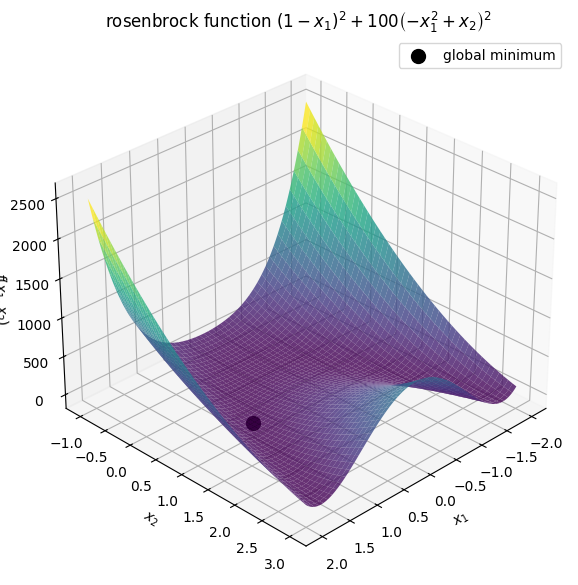

In [2]:
# define symbolic variables
x1, x2 = sp.symbols('x1 x2')

# define this rosenbrock function symbolically
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# compute the gradient
grad = [sp.diff(f_expr, var) for var in (x1, x2)]
#display(f'grad: {sp.latex(grad)}')
print("Gradiant:")
display(grad)

# solve for critical points
critical_points = sp.solve(grad, (x1, x2), dict=True)
minimum_point = critical_points[0]
minimum_value = f_expr.subs(minimum_point)
print("minimum at:", minimum_point)
print("value at minimum:", minimum_value)

# create a grid for numerical evaluation
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# lambdify symbolic expression to numerical function
f_num = sp.lambdify((x1, x2), f_expr, modules='numpy')
Z = f_num(X, Y)

# create our 3d plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# mark the global minimum
min_x = float(minimum_point[x1])
min_y = float(minimum_point[x2])
min_z = float(minimum_value)
ax.scatter(min_x, min_y, min_z, color='black', s=100, label='global minimum')

# rotate our view
ax.view_init(elev=30, azim=45)

# add labels and title
ax.set_title(rf'rosenbrock function ${sp.latex(f_expr)}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.legend()
plt.show()


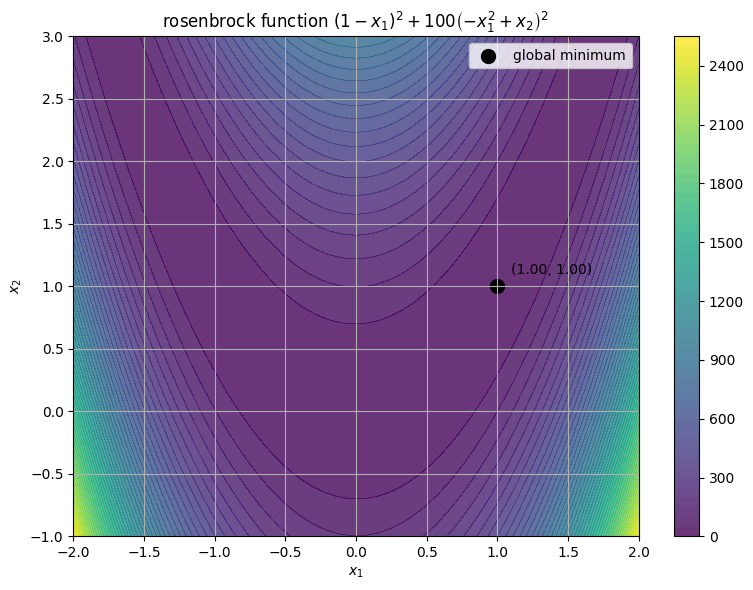

In [3]:
# plot contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour)

# mark global minimum
plt.scatter(min_x, min_y, color='black', s=100, label='global minimum')
plt.text(min_x + 0.1, min_y + 0.1, f'({min_x:.2f}, {min_y:.2f})', color='black')

# title and labels
plt.title(rf'rosenbrock function ${sp.latex(f_expr)}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Derive the gradient of the Rosenbrock function. Visualize the (negative) gradient field using `plt.quiver` or `go.Cone`.

minimum at: {x1: 1, x2: 1}
value at minimum: 0


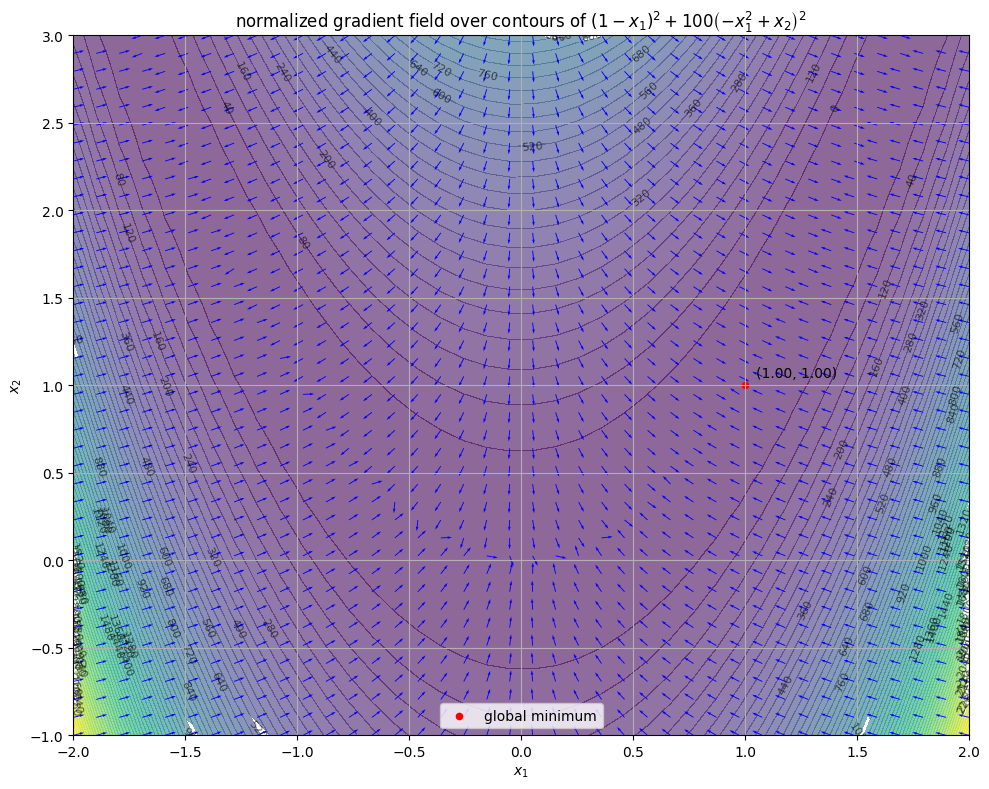

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# define symbolic variables
x1, x2 = sp.symbols('x1 x2')

# define the rosenbrock function symbolically
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2

# compute the gradient
grad = [sp.diff(f_expr, var) for var in (x1, x2)]

# solve for critical points
critical_points = sp.solve(grad, (x1, x2), dict=True)
minimum_point = critical_points[0]
minimum_value = f_expr.subs(minimum_point)
print("minimum at:", minimum_point)
print("value at minimum:", minimum_value)

# lambdify function and gradient components
f_num = sp.lambdify((x1, x2), f_expr, modules='numpy')
grad_num = [sp.lambdify((x1, x2), g, modules='numpy') for g in grad]

'''
# create a coarse grid focused near the global minimum
res = 20
tol = 0.0001
x_vals = np.linspace(1 - tol, 1 + tol, res)
y_vals = np.linspace(1 - tol, 1 + tol, res)
X, Y = np.meshgrid(x_vals, y_vals)
'''
# or not
res = 40
tol = 1
x_vals = np.linspace(-2, 2, res)
y_vals = np.linspace(-1, 3, res)
X, Y = np.meshgrid(x_vals, y_vals)

# evaluate function and gradient field
Z = f_num(X, Y)
U_raw = -grad_num[0](X, Y)
V_raw = -grad_num[1](X, Y)

# normalize vectors for consistent arrow length
magnitude = np.sqrt(U_raw**2 + V_raw**2)
magnitude[magnitude == 0] = 1e-8  # avoid division by zero
U = U_raw / magnitude
V = V_raw / magnitude

# plot contour and gradient field
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=80,  alpha=0.6)  # cmap='viridis',linewidths=1,
plt.clabel(contour, inline=True, fontsize=8, colors='black') # contour labels
plt.quiver(X, Y, U, V, color='blue', scale=80, width=0.001)

# mark the global minimum
min_x = float(minimum_point[x1])
min_y = float(minimum_point[x2])
plt.scatter(min_x, min_y, color='red', s=20, label='global minimum')
plt.text(min_x + tol/20, min_y + tol/20, f'({min_x:.2f}, {min_y:.2f})', color='black')

# add labels and title
plt.title(rf'normalized gradient field over contours of ${sp.latex(f_expr)}$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3) Simulated Annealing

Suppose you only have access to the function value but not its gradient, simulated annealing is perhaps the most straightforward optimization method to implement. Therefore, as a warm-up exercise, implement the simulated annealing algorithm to find the minimum of the Rosenbrock function.

The algorithm works as follows:
1. Start from an initial point (e.g., (-1, 2)).
2. Generate a new candidate point by adding a small random perturbation to the current point.
3. Decide whether to accept the new point based on the Metropolis criterion:
$$P_\text{move} = \begin{cases} 1 & \text{if } \Delta E < 0 \\ e^{-\Delta E / T} & \text{if } \Delta E \geq 0 \end{cases}$$
4. Start with a high temperature $T$ (e.g., 1.0)
5. Optional Gradually cool down (e.g., by multiplying $T$ by 0.9).
6. Repeat steps 2-5 for a sufficient number of iterations (e.g., 1000).

Plot the trajectory of points visited during the optimization on top of the contour plot of the Rosenbrock function. Also plot the function value versus iteration number to show convergence.

Discuss the results. How close did you get to the global minimum? How does the choice of temperature affect the optimization? How does the cooling affect the results?

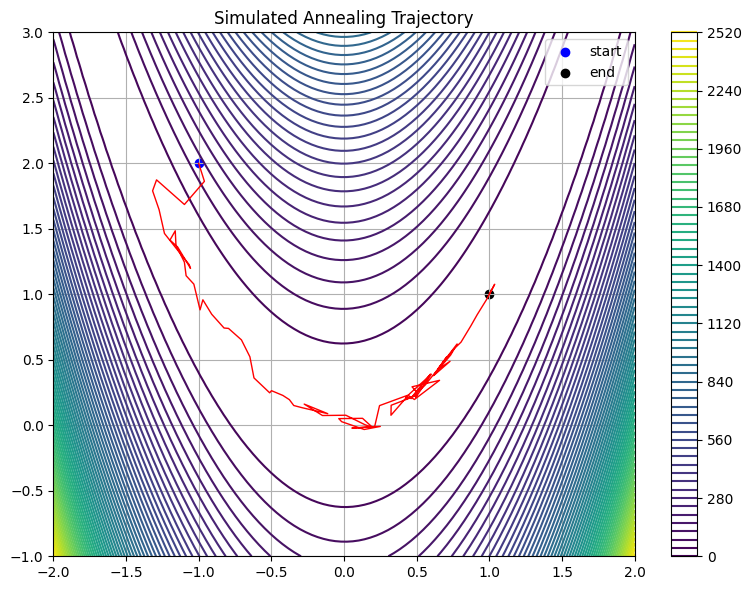

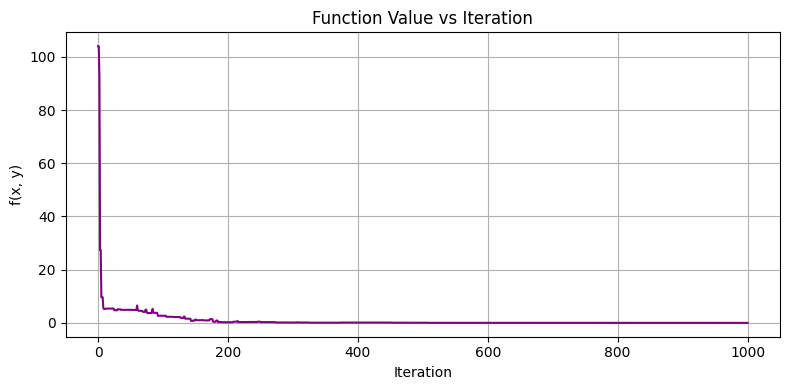

In [46]:
def sim_annealing(func,
        x_0=-1, y_0=2,
        x_min=-2, x_max=2,
        y_min=-1, y_max=3,
        T=1.0, N = 1000, cooling_factor = 0.9
    ):
    #epsilon = np.sqrt((x_max - x_min)**2 + (y_max - y_min)**2) / 30.0 # some fraction of the diagonal domain
    epsilon = (x_max - x_min + y_max - y_min) / 40.0
    iterations = N
    x, y = x_0, y_0
    path = [(x, y)]
    energy = [func(x, y)]
    
    np.random.seed(42)
    for i in range(iterations):
        x_p = np.random.uniform(-epsilon, +epsilon) 
        y_p = np.random.uniform(-epsilon, +epsilon) 

        x_new = x + x_p
        y_new = y + y_p
        E_new = func(x_new, y_new)
        dE = E_new - energy[-1]
        
        if dE < 0 or np.random.rand() < np.exp(-dE / (T + 1e-8)):
            x, y = x_new, y_new
            energy.append(E_new)
            path.append((x, y))
            
        else:
            energy.append(energy[-1])
            path.append((x, y))
        
        T *= cooling_factor
            

    return np.array(path), np.array(energy)

def show_path(func, path, x_min=-2.0, x_max=2.0, y_min=-1.0, y_max=3.0, n=100, title="undefined"):
    a = np.linspace(x_min, x_max, n)
    b = np.linspace(y_min, y_max, n)
    x, y = np.meshgrid(a, b)
    z = func(x, y)

    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contour(x, y, z, levels=80, cmap='viridis')
    plt.colorbar(contour)
    ax.plot(path[:, 0], path[:, 1], color='red', linewidth=1)
    ax.scatter(path[0, 0], path[0, 1], color='blue', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], color='black', label='end')
    ax.legend()
    ax.set_title("Simulated Annealing Trajectory")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_convergence(energy):
    plt.figure(figsize=(8, 4))
    plt.plot(energy, color='purple')
    plt.title("Function Value vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("f(x, y)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

f = sp.lambdify((x1, x2), f_expr, "math")
path, energy = sim_annealing(f, cooling_factor=.99, T=1)
show_path(f, path, title="Simulated Annealing Trajectory")
show_convergence(energy)

In [6]:
p_true = np.array((min_x, min_y))
print(f"p_true: {p_true}")

p_anneal = np.array(path[-1])
print(f"p_anneal: {p_anneal}")

error_abs = np.abs(np.linalg.norm(p_true-p_anneal))
print(f"Absolute Error: {error_abs:2.4f}")

error_rel = error_abs / np.linalg.norm(p_true)
print(f"Relative Error: {error_rel:2.4f}")

p_true: [1. 1.]
p_anneal: [1.00064556 1.00133647]
Absolute Error: 0.0015
Relative Error: 0.0010


**Discuss the Results**

*How close did you get to the global minimum?*

We compared the distance between the true minimum \((1, 1)\) and the final point reached by simulated annealing. This yielded the following metrics:
```
Absolute Error: 0.0015
Relative Error: 0.0010
```
The absolute error reflects the Euclidean distance between the two points, while the relative error scales this distance by the norm of the true minimum.
Both values indicate that the algorithm converged very closely to the global minimum.

We had to tune our random step size.  We chose a step size proportional to the sum of the domain widths.  Further tuning or adaptive scaling strategies could improve convergence and robustness.

*How does the choice of temperature affect the optimization?*

The initial temperature \(T\) controls the randomness of the search:

- **High temperature** allows the algorithm to explore widely, accepting uphill moves and escaping local minima.
- **Low temperature** restricts movement, resulting in a more deterministic and smoother path toward the minimum.

Choosing a temperature that's too low can trap the algorithm early, while too high may delay convergence.

*How does the cooling affect the results?*

Cooling was implemented by multiplying the temperature by a **cooling factor** at each iteration:

- **Cooling factor > 1** simulates heating, propably not useful for optimization.
- **Cooling factor = 1** maintains a constant temperature, effectively random search.
- **Cooling factor < 1** simulates cooling, the standard approach.

Slower cooling (e.g., factor close to 1 like 0.995) allows more exploration and smoother convergence. Faster cooling (e.g., 0.9) can cause premature freezing and suboptimal results.

### 4) Gradient Descent

If you have access to the gradient of the function, gradient descent is a more efficient optimization method, especially in high-dimensional spaces. This is also the basis for many advanced optimization algorithms. Let's implement the basic gradient descent algorithm to find the minimum of the Rosenbrock function.

The algorithm works as follows:
1. Start from an initial point (e.g., (1.5, 2.5)).
2. Update the current point using the gradient $g$ with a fixed learning rate $\eta$ (e.g., 0.001):
$$x \leftarrow x - \eta \, g(x)$$
3. Repeat step 2 for a sufficient number of iterations (e.g., 1000).

Plot the trajectory of points visited during the optimization on top of the contour plot of the Rosenbrock function. Also plot the function value versus iteration number to show convergence.

Discuss the results. How close did you get to the global minimum? How does the choice of learning rate affect the optimization?

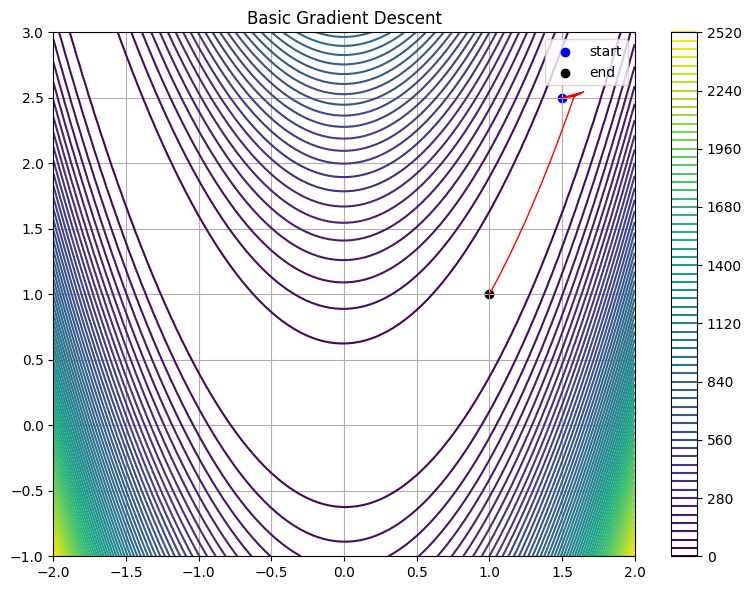

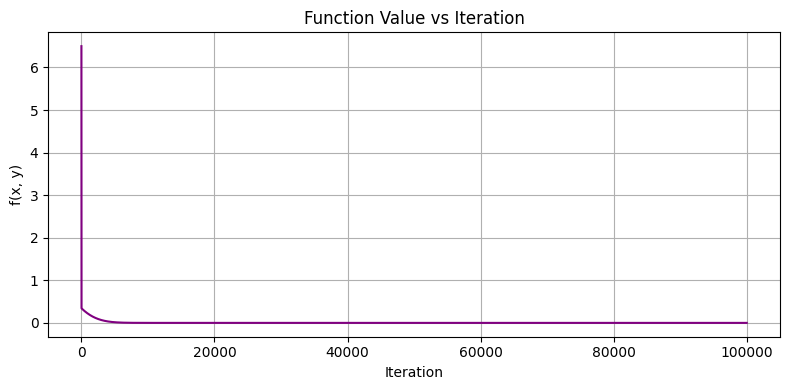

Final position: [1. 1.]


In [7]:
# let's do it a silly way first
def basic_gradient_descent(func, dfdx, dfdy, x_0=1.5, y_0=2.5, x_min=-2, x_max=2, y_min=-1, y_max=3, N=100000, learning_rate=0.001):
    x, y = x_0, y_0
    path = [(x, y)]
    energy = [func(x, y)]

    for _ in range(N):
        # gradient descent update
        x -= learning_rate * dfdx(x, y)
        y -= learning_rate * dfdy(x, y)

        E = func(x, y)
        path.append((x, y))
        energy.append(E)

    return np.array(path), np.array(energy)

f = sp.lambdify((x1, x2), f_expr, "math")
grad = [sp.diff(f_expr, var) for var in (x1, x2)] # silly, if we know this why do GD?
dfdx = sp.lambdify((x1, x2), grad[0], "math")
dfdy = sp.lambdify((x1, x2), grad[1], "math")

path, energy = basic_gradient_descent(f, dfdx, dfdy, x_0=1.5, y_0=2.5, learning_rate=0.001)
show_path(f, path, title="Basic Gradient Descent")
show_convergence(energy)
print(f"Final position: {path[-1]}")

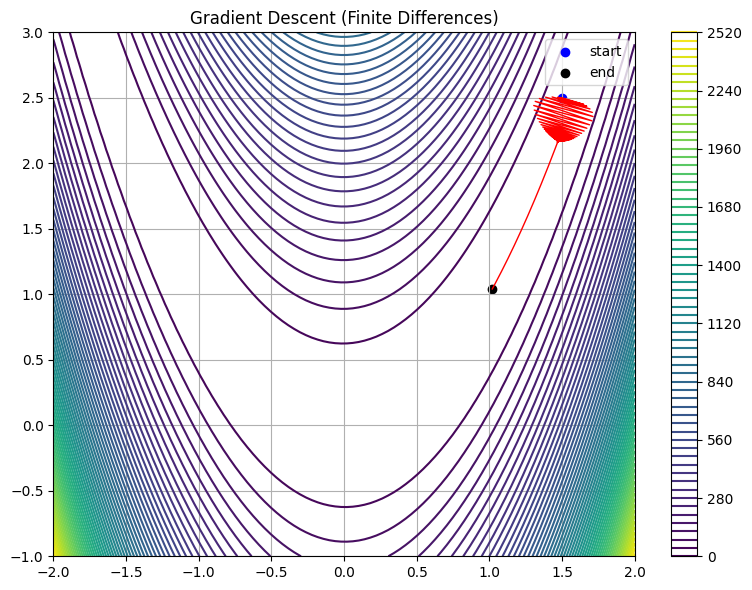

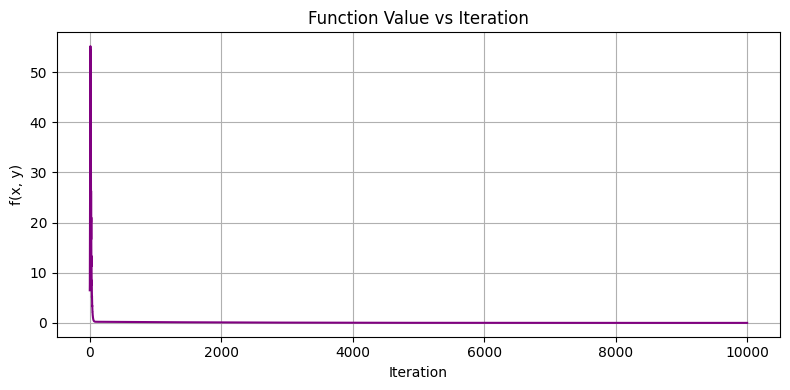

Final position: [1.02019773 1.04088325]


In [8]:
# use finite differences instead
def basic_gradient_descent_fd(func, x_0=1.5, y_0=2.5, N=100000, learning_rate=0.001, h=1e-5):
    x, y = x_0, y_0
    path = [(x, y)]
    energy = [func(x, y)]

    for _ in range(N):
        # use central difference approximation
        dfdx = (func(x + h, y) - func(x - h, y)) / (2 * h)
        dfdy = (func(x, y + h) - func(x, y - h)) / (2 * h)

        # gradient descent update
        x -= learning_rate * dfdx
        y -= learning_rate * dfdy

        E = func(x, y)
        path.append((x, y))
        energy.append(E)

    return np.array(path), np.array(energy)

f = sp.lambdify((x1, x2), f_expr, "math")
path, energy = basic_gradient_descent_fd(f, x_0=1.5, y_0=2.5, learning_rate=0.001, N=10000)
show_path(f, path, title="Gradient Descent (Finite Differences)")
show_convergence(energy)
print(f"Final position: {path[-1]}")

In [9]:
p_true = np.array((min_x, min_y))
print(f"p_true: {p_true}")

p_appox = np.array(path[-1])
print(f"p_appox: {p_appox}")

error_abs = np.abs(np.linalg.norm(p_true-p_appox))
print(f"Absolute Error: {error_abs:2.3f}")

error_rel = error_abs / np.linalg.norm(p_true)
print(f"Relative Error: {error_rel:2.3f}")

p_true: [1. 1.]
p_appox: [1.02019773 1.04088325]
Absolute Error: 0.046
Relative Error: 0.032


### 5) Momentum Method

You may find that the basic gradient descent method converges slowly. In practice, more advanced variants of gradient descent are often used, such as momentum. The momentum method updates the current point as follows:
1. Initialize the velocity $v$ to 0.
2. Update the velocity with a momentum factor $\mu$ (e.g., 0.9) and the gradient $g$:
$$v \leftarrow \mu v + g(x)$$
3. Update the current point using the velocity $v$ and learning rate $\eta$:
$$x \leftarrow x - \eta v$$
4. Repeat steps 2-3 for a sufficient number of iterations (e.g., 1000).
Implement the momentum method and compare its performance with the basic gradient descent method. Plot the trajectories and function values for both methods on the same plots for comparison.

Discuss the results. How does the momentum method improve convergence? How do the hyperparameters affect the results?

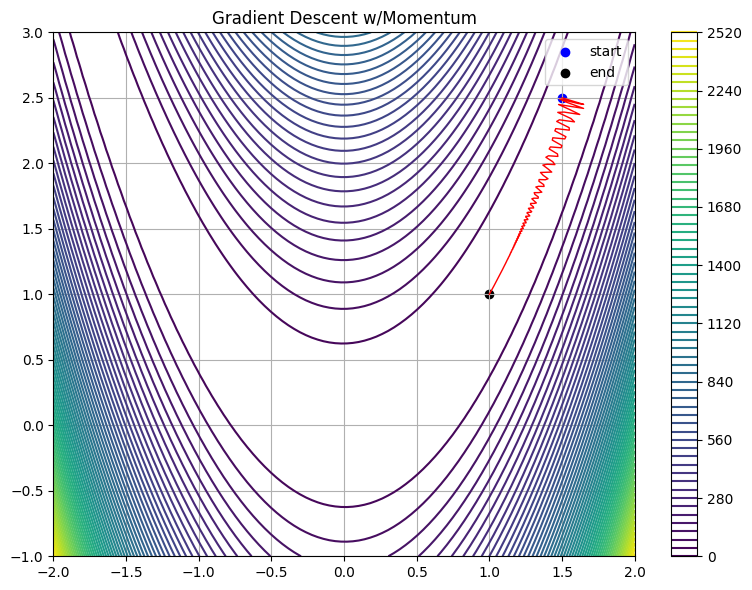

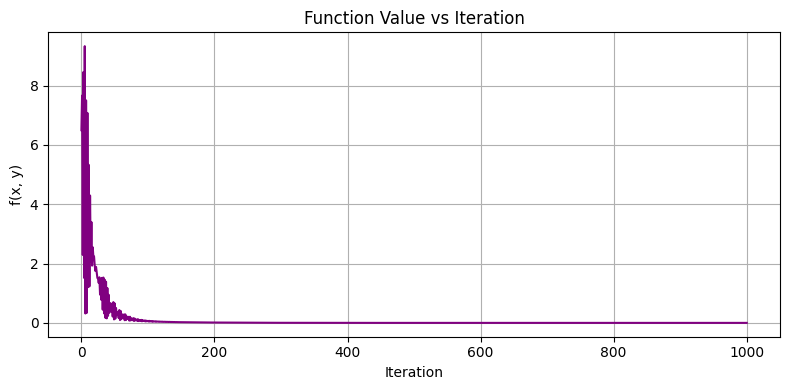

Final position: [1.00014763 1.00029588]


In [33]:
# again, let's be silly
def gradient_descent_with_momentum(func, dfdx, dfdy, x_0=-1, y_0=2, N=1000, learning_rate=0.001, momentum=0.9):
    x, y = x_0, y_0
    vx, vy = 0.0, 0.0
    path = [(x, y)]
    energy = [func(x, y)]

    for _ in range(N):
        # compute gradient
        gx = dfdx(x, y)
        gy = dfdy(x, y)

        # update velocity
        vx = momentum * vx + gx
        vy = momentum * vy + gy

        # update position
        x -= learning_rate * vx
        y -= learning_rate * vy

        path.append((x, y))
        energy.append(func(x, y))

    return np.array(path), np.array(energy)

f = sp.lambdify((x1, x2), f_expr, "math")
grad = [sp.diff(f_expr, var) for var in (x1, x2)]
dfdx = sp.lambdify((x1, x2), grad[0], "math")
dfdy = sp.lambdify((x1, x2), grad[1], "math")

path, energy = gradient_descent_with_momentum(f, dfdx, dfdy, x_0=1.5, y_0=2.5, learning_rate=0.001, momentum=0.945)
show_path(f, path, title="Gradient Descent w/Momentum")
show_convergence(energy)
print(f"Final position: {path[-1]}")

In [11]:
# now let's be more series... ;-p
def gradient_descent_with_momentum_fd(func,x_0=-1, y_0=2, N=1000, learning_rate=0.001, momentum=0.9, h=1e-5):
    x, y = x_0, y_0
    vx, vy = 0.0, 0.0
    path = [(x, y)]
    energy = [func(x, y)]

    for _ in range(N):
        # compute gradient
        # use central difference approximation
        gx = (func(x + h, y) - func(x - h, y)) / (2 * h)
        gy = (func(x, y + h) - func(x, y - h)) / (2 * h)
        
        # update velocity
        vx = momentum * vx + gx
        vy = momentum * vy + gy

        # update position
        x -= learning_rate * vx
        y -= learning_rate * vy

        path.append((x, y))
        energy.append(func(x, y))

    return np.array(path), np.array(energy)

f = sp.lambdify((x1, x2), f_expr, "math")

In [31]:
%time
path, energy = gradient_descent_with_momentum_fd(f, x_0=1.5, y_0=2.5, learning_rate=0.001, momentum=0.945)

CPU times: user 11 μs, sys: 0 ns, total: 11 μs
Wall time: 20.7 μs


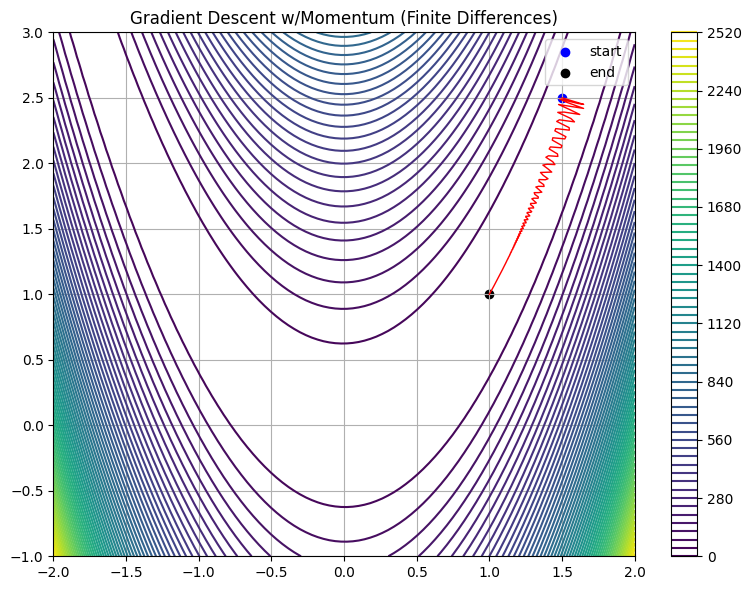

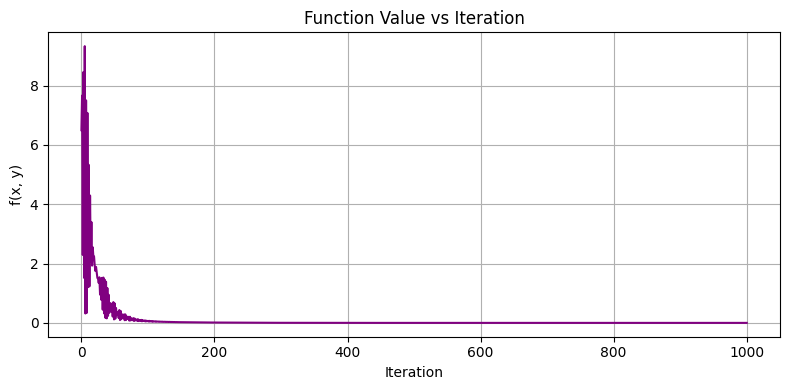

Final position: [1.00014761 1.00029584]


In [32]:
show_path(f, path, title="Gradient Descent w/Momentum (Finite Differences)")
show_convergence(energy)
print(f"Final position: {path[-1]}")

In [14]:
p_true = np.array((min_x, min_y))
print(f"p_true: {p_true}")

p_appox = np.array(path[-1])
print(f"p_appox: {p_appox}")

error_abs = np.abs(np.linalg.norm(p_true-p_appox))
print(f"Absolute Error: {error_abs:2.7f}")

error_rel = error_abs / np.linalg.norm(p_true)
print(f"Relative Error: {error_rel:2.7f}")

p_true: [1. 1.]
p_appox: [1.02092247 1.04236534]
Absolute Error: 0.0472501
Relative Error: 0.0334109


**Discuss the results.**

Using carefully selected hyperparameters, we were able to reach the minimum eventually, though convergence depended heavily on the initial starting point.
The Rosenbrock function's narrow, curved valley makes it particularly sensitive to initialization and step size.

*How does the momentum method improve convergence?*

With too little momentum, the optimizer progresses slowly and fails to reach the minimum within 1000 iterations.
With too much momentum, the trajectory overshoots and oscillates... either around the minimum or away from it entirely.
This behavior was amplified by the Rosenbrock function's steep curvature along one axis and flat curvature along the other, which causes a misalignment between the gradient direction and the optimal path.

*How do the hyperparameters affect the results?*

A learning rate that is too large causes the optimizer to overshoot the minimum, while a rate that is too small results in slow progress or stagnation.
The momentum factor must also be tuned carefully: it controls the influence of past gradients and can either accelerate convergence or destabilize it.
These effects are especially pronounced for the Rosenbrock function due to its non-convex geometry and poor conditioning.
In this setting, hyperparameter tuning is critical for achieving reliable convergence.

**Note:** See *Deflated Conjugate Gradient* below.  This is where it start to dawn on use just how wierd the Rosenbrock function really is.

### 6) More Advanced Methods

Research (e.g. [Bishop](https://www.bishopbook.com/), chapter 7.2.3 - 7.3.3) and implement advanced optimization methods (e.g., RMSprop, Adam, etc.) to optimize the Rosenbrock function. Some of these methods may require different hyperparameters or configurations (e.g., higher learning rates, different forms of momentum terms). Compare its performance with the previous methods. Explain why (or why not) it performs better.

**Conjugate Gradient (CG)**

The Conjugate Gradient method is an iterative algorithm for solving symmetric positive-definite linear systems of the form $( H(x)p = -\nabla f(x) )$.
Unlike gradient descent, CG uses conjugate directions, which are mutually $H$-orthogonal, to accelerate convergence and avoid redundant steps.
In the ideal case of a convex quadratic objective, CG converges in at most $( n )$ steps for $( n )$ dimensions.

However, CG performance degrades when the Hessian is ill-conditioned or nearly singular.
Small eigenvalues cause slow progress along certain directions, and the method becomes sensitive to round-off errors and numerical instability.

---

**Deflated Conjugate Gradient (DCG)**

DCG enhances the standard Conjugate Gradient method by projecting out directions associated with small eigenvalues of the Hessian, improving numerical stability and accelerating convergence in ill-conditioned optimization problems.
To solve $( H(x)p = -\nabla f(x) )$, DCG applies a deflation projection using a subspace $( Z )$. The projection matrix is:

$$
P = I - HZ(Z^T HZ)^{-1} Z^T
$$

and the residual is deflated as:

$$
r_{\text{deflated}} = P r
$$

CG iterations proceed using this modified residual. Each update follows:

$$
x_{k+1} = x_k + \eta_k p_k
$$

with adaptive step size $( \eta_k )$.

Possible choices for the deflation basis $( Z )$ include previous gradients, approximate eigenvectors, or fixed orthogonal directions (used in our implementation).

**Note:** In convex quadratic problems, CG converges in at most $( n )$ steps for $( n )$ dimensions.
However, the Rosenbrock function is non-convex, and its Hessian is not always positive semi-definite.
This violates CG's assumptions and leads to slower convergence.
While deflation mitigates poor conditioning, its benefits are limited in small, nonlinear problems.
Nonetheless, we observed an order-of-magnitude improvement in error and nearly two orders of magnitude improvement in convergence rate.
The algorithm is also highly parallelizable, making it well-suited for large-scale optimization.

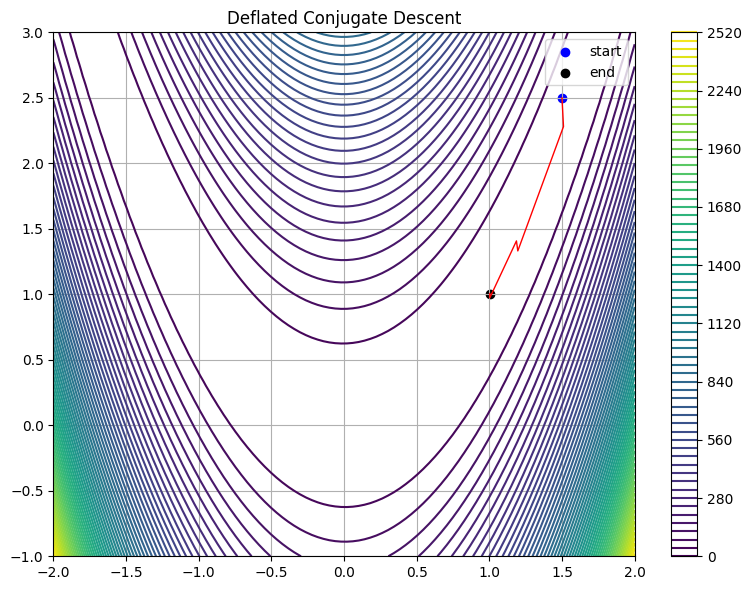

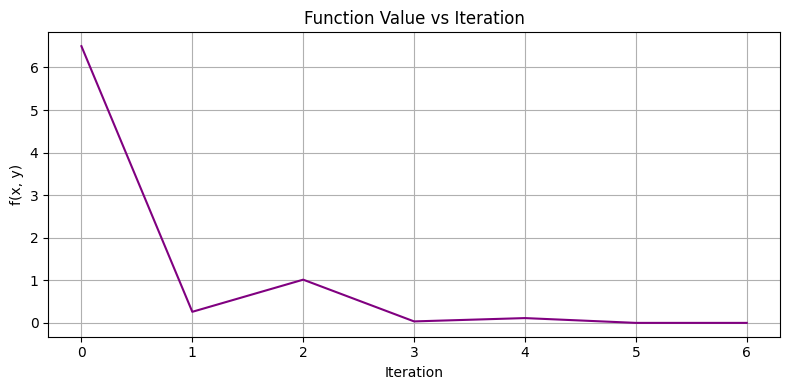

Final position: [1.00283685 1.00568157]


In [15]:
# we're intentionally being a bit impractical here
# this was our sandbox for ironing out the weirdness,
# ...catching bugs, and testing our logic.

def deflated_cg(H, b, Z=None, tol=1e-6, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    r = b.copy()

    if Z is not None:
        HZ = H @ Z
        ZHZ = Z.T @ HZ
        P = np.eye(n) - HZ @ np.linalg.pinv(ZHZ) @ Z.T
        r = P @ r

    p = r.copy()
    rs_old = np.dot(r, r)

    for _ in range(max_iter):
        Hp = H @ p
        denom = np.dot(p, Hp)
        if denom == 0: # avoid div-by-zero
            break
        alpha = rs_old / denom
        x += alpha * p
        r -= alpha * Hp

        if np.linalg.norm(r) < tol:
            break

        rs_new = np.dot(r, r)
        p = r + (rs_new / rs_old) * p
        rs_old = rs_new

    return x

def optimize_dcg(f, grad_f, hess_f, x0, N=10, deflate=True):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    energy = [f(*x)]

    for _ in range(N):
        g = np.array(grad_f(*x))
        H = np.array(hess_f(*x))
        b = -g

        Z = None
        if deflate and len(path) > 5:
            Z = np.array([[1.0, 0.0], [0.0, 1.0]]).T  # use fixed orthogonal basis

        p = deflated_cg(H, b, Z=Z)
        eta = min(1.0, 1.0 / (np.linalg.norm(p) + 1e-8))  # adaptive step... just for fun
        x += eta * p

        path.append(x.copy())
        energy.append(f(*x))

    return np.array(path), np.array(energy)

# craxy is what crazy does...
x1, x2 = sp.symbols('x1 x2')
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2
grad_expr = [sp.diff(f_expr, var) for var in (x1, x2)]
hessian_expr = sp.hessian(f_expr, (x1, x2))

f_num = sp.lambdify((x1, x2), f_expr, "numpy")
grad_num = sp.lambdify((x1, x2), grad_expr, "numpy")
hessian_num = sp.lambdify((x1, x2), hessian_expr, "numpy")

x0 = [1.5, 2.5]
path, energy = optimize_dcg(f_num, grad_num, hessian_num, x0, N=6, deflate=True)
show_path(f_num, path, title="Deflated Conjugate Descent")
show_convergence(energy)
print(f"Final position: {path[-1]}")

In [16]:
# multilinear baby!!!
# ...if only we were getting paid for this.

def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = x.copy()
        x_backward = x.copy()
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(*x_forward) - f(*x_backward)) / (2 * h)
    return grad

def numerical_hessian(f, x, h=1e-5):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_pp = x.copy(); x_pp[i] += h; x_pp[j] += h
            x_pm = x.copy(); x_pm[i] += h; x_pm[j] -= h
            x_mp = x.copy(); x_mp[i] -= h; x_mp[j] += h
            x_mm = x.copy(); x_mm[i] -= h; x_mm[j] -= h
            H[i, j] = (f(*x_pp) - f(*x_pm) - f(*x_mp) + f(*x_mm)) / (4 * h**2)
    return H

def optimize_dcg_fd(f, x0, N=10, deflate=True, h=1e-5):
    x = np.array(x0, dtype=float)
    path = [x.copy()]
    energy = [f(*x)]

    for _ in range(N):
        g = numerical_gradient(f, x, h)
        H = numerical_hessian(f, x, h)
        b = -g

        Z = None
        if deflate and len(path) > 5:
            Z = np.eye(len(x))  # use fixed orthogonal basis

        p = deflated_cg(H, b, Z=Z)
        eta = min(1.0, 1.0 / (np.linalg.norm(p) + 1e-8))  # adaptive step
        x += eta * p

        path.append(x.copy())
        energy.append(f(*x))

    return np.array(path), np.array(energy)

In [17]:
x1, x2 = sp.symbols('x1 x2')
f_expr = 100 * (x2 - x1**2)**2 + (1 - x1)**2
f_num = sp.lambdify((x1, x2), f_expr, "numpy")

x0 = [1.5, 2.5]

In [41]:
%time
path, energy = optimize_dcg_fd(f_num, x0, N=10, deflate=True)

CPU times: user 10 μs, sys: 0 ns, total: 10 μs
Wall time: 19.1 μs


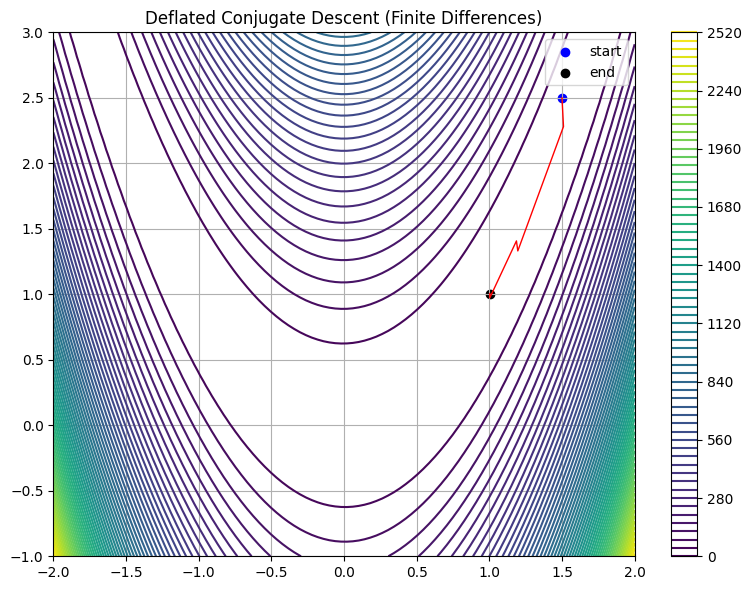

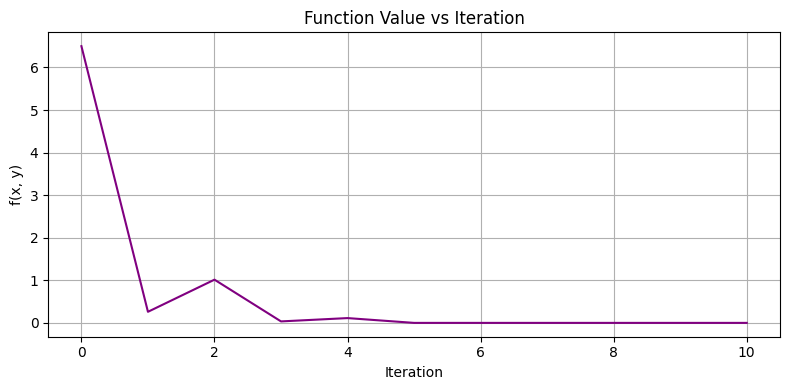

Final position: [1.00283684 1.00568154]


In [43]:
show_path(f_num, path, title="Deflated Conjugate Descent (Finite Differences)")
show_convergence(energy)
print(f"Final position: {path[-1]}")

In [44]:
p_true = np.array((min_x, min_y))
print(f"p_true: {p_true}")

p_appox = np.array(path[-1])
print(f"p_appox: {p_appox}")

error_abs = np.abs(np.linalg.norm(p_true-p_appox))
print(f"Absolute Error: {error_abs:2.7f}")

error_rel = error_abs / np.linalg.norm(p_true)
print(f"Relative Error: {error_rel:2.7f}")

p_true: [1. 1.]
p_appox: [1.00283684 1.00568154]
Absolute Error: 0.0063504
Relative Error: 0.0044904


**Compare its performance with the previous methods. Explain why (or why not) it performs better.**

We selected Deflated Conjugate Descent for its theoretical advantages: improved numerical stability, reduced sensitivity to ill-conditioning, and strong potential for parallel acceleration.
In convex quadratic settings, the Conjugate Gradient method converges in at most $n$ steps for $n$ dimensions.

Compared to basic gradient descent, DCG achieved significantly faster convergence and lower final error.
We observed an order-of-magnitude improvement in error and nearly two orders of magnitude improvement in convergence rate.
This stems from DCG's ability to suppress directions associated with small eigenvalues, which often hinder first-order methods.

However, the Rosenbrock function is non-convex, and its Hessian is not guaranteed to be positive semi-definite.
This violates CG's assumptions and leads to slower convergence.
While deflation helps mitigate poor conditioning, its impact was limited in small-scale, nonlinear problems like this one.

Nonetheless, DCG outperformed gradient descent in both accuracy and efficiency.
Its structure lends itself to high degrees of parallelism, making it a promising candidate for large-scale optimization, especially when approximate curvature information can be estimated or learned.

---

**Going Deeper**

We were reminded of the Deflated Conjugate Gradient method during Leon Hostetler's talk at the NERSC User Group last week.
His team's work on accelerating Lattice QCD inversions inspired us to experiment with DCG ourselves.

Although the method has strong theoretical appeal, it struggled with the Rosenbrock function due to non-convexity and poor conditioning.
Still, we observed meaningful improvements in convergence and error.

In hindsight, the **Nelder-Mead** method might have been more appropriate.
Its derivative-free, simplex-based updates are well-suited to navigating curved valleys without relying on gradient or Hessian information.

This exploration deepened our understanding of how curvature, conditioning, and algorithmic assumptions interact, especially in machine learning, where such information is often unavailable or expensive to compute.
We also enjoyed revisiting linear algebra fundamentals and found ourselves reaching for one of our favorite textbooks by Gil Strang.

We note that Bishop removed CG from the draft of his latest text, and Strang omitted it from the Deep Learning section of his own.
Strang remarked that "the matrices there are simply too large for conjugate gradients."

Indeed, the primary limitation is that although CG requires few iterations, each iteration involves substantial computation.
Deflation can reduce this cost, but our toy implementation does not fully exploit matrix sparsity or optimize the inner loop of our **Numerical Hessian**.
Nonetheless, even our dense implementation lends itself to parallelization.


# Resources

Rosenbrock function:
 - https://en.wikipedia.org/wiki/Rosenbrock_function
 - https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

Conjugate Gradient / Deﬂated Conjugate Gradient:

 - Linear Algebra and Learning from Data, Strang, Chapter II.I Section Conjugate Gradients for $Sx=b$
 - Matrix Computations, Golab and van Loan
 - CS267 (Applications of Parallel Computers) Lecture notes, Demmel et al.
 - Deflation & Multigrid for LQCD, Hostetler et al. https://drive.google.com/file/d/1VJ931AdU-RwHzGN8wC--hhsEq3btv0gZ/view
 - Hierarchically deﬂated conjugate gradient, Boyle: https://arxiv.org/pdf/1402.2585
 - Fast deflated conjugate gradient method with proper
orthogonal decomposition for topology optimization, Watanabe & Oshima: https://www.jstage.jst.go.jp/article/jasse/8/1/8_154/_pdf/-char/en
 - The Deflated Conjugate Gradient Method:
Convergence, Perturbation and Accuracy, Kahl & Rittich: https://arxiv.org/pdf/1209.1963
 - A Deflated Version of the Conjugate Gradient Algorithm, Saad et al: https://inria.hal.science/inria-00523686/file/sisc-2000.pdf